<a href="https://colab.research.google.com/github/atahantekcan/precision_farming/blob/main/graphs_and_analyze_funcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRAPHS AND ANALYZE FUNCTIONS

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [16]:
df = pd.read_csv("Crop_recommendation.csv")

Graphs

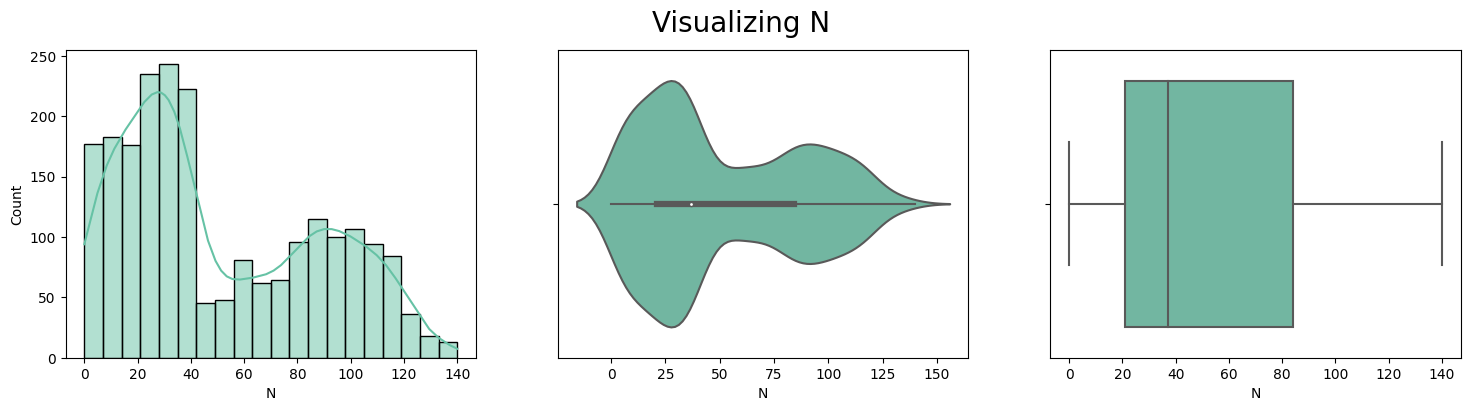

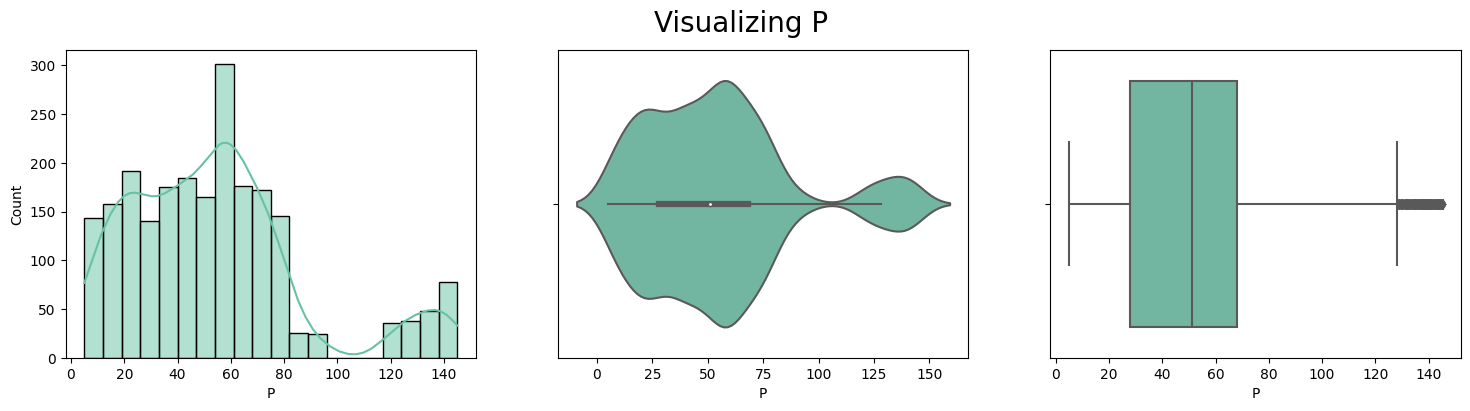

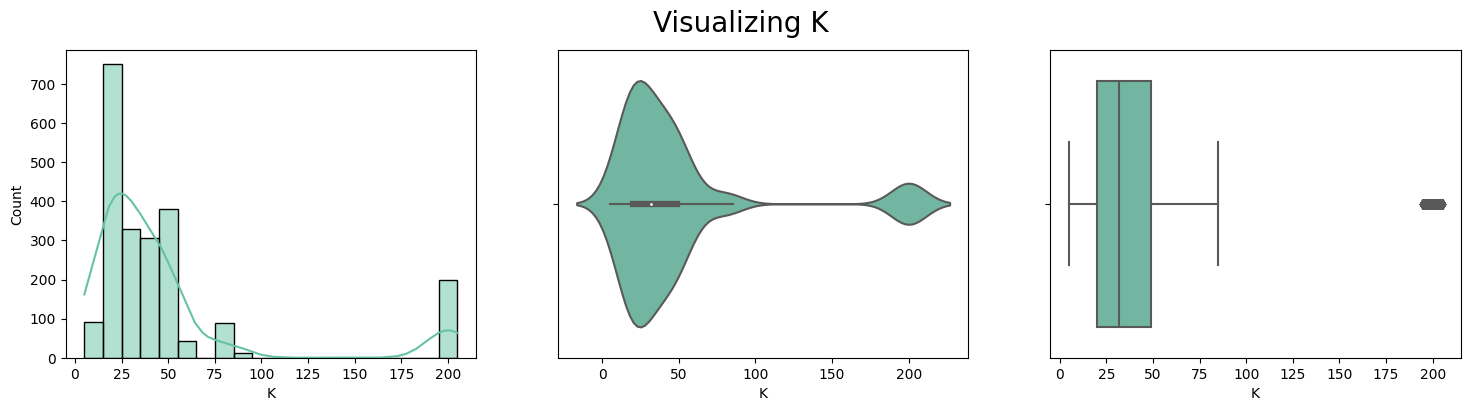

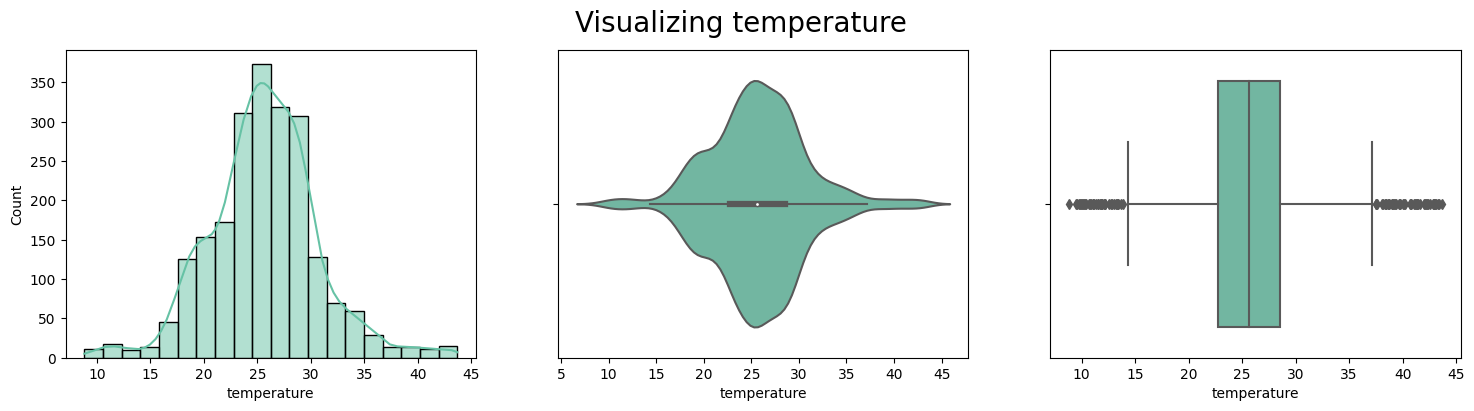

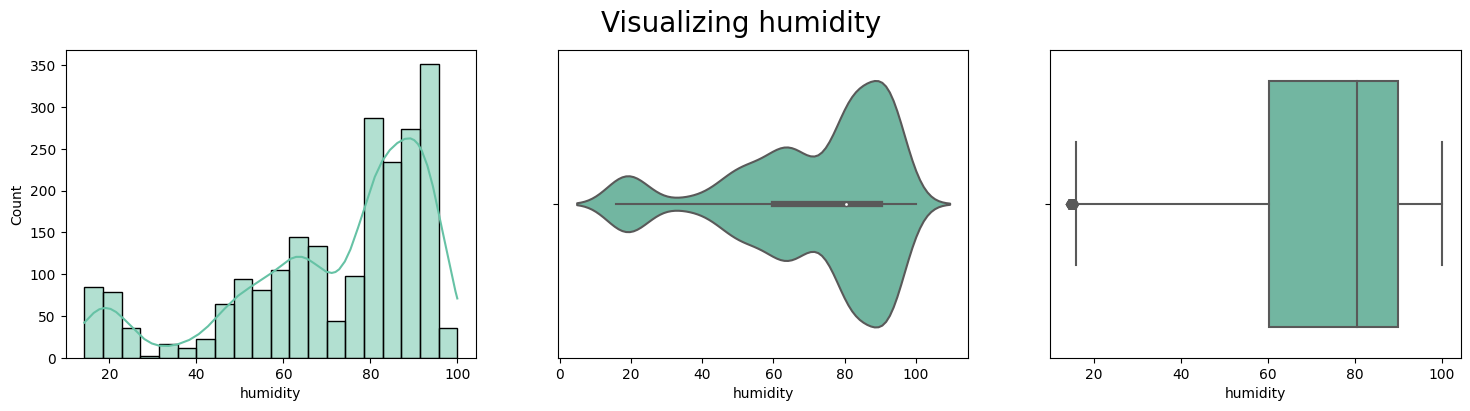

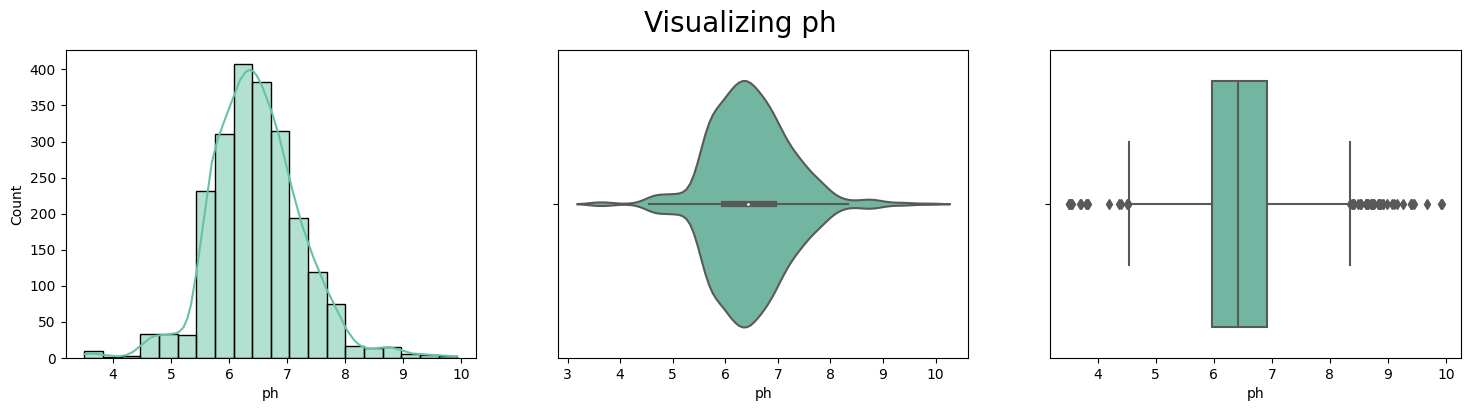

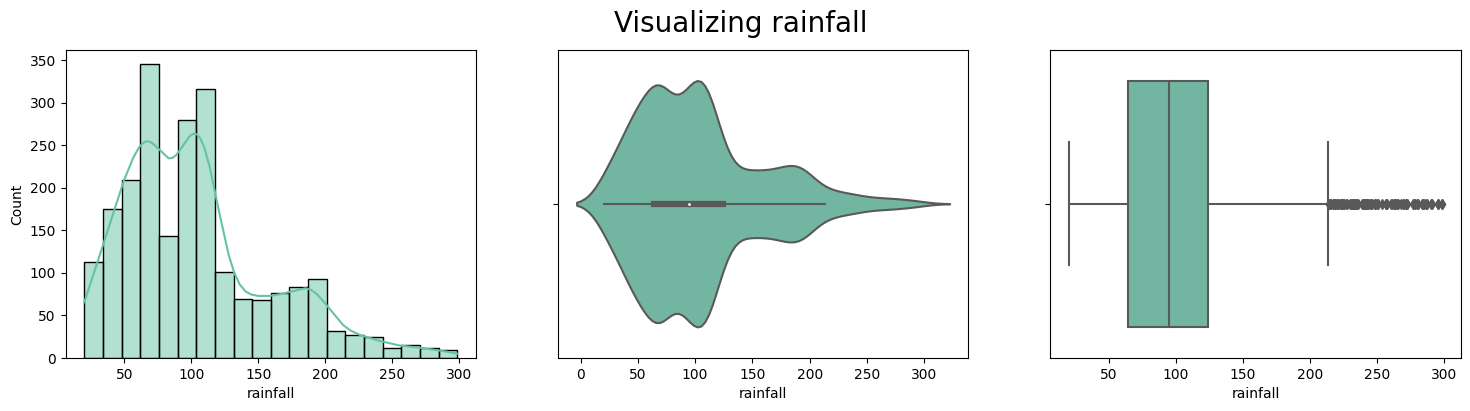

In [17]:
# Visualizing variables w histogram, violin and boxplot
plt.style.use('fast')
sns.set_palette("Set2")
for i in df.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=df,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=df,x=i,ax=ax[1])
    sns.boxplot(data=df,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

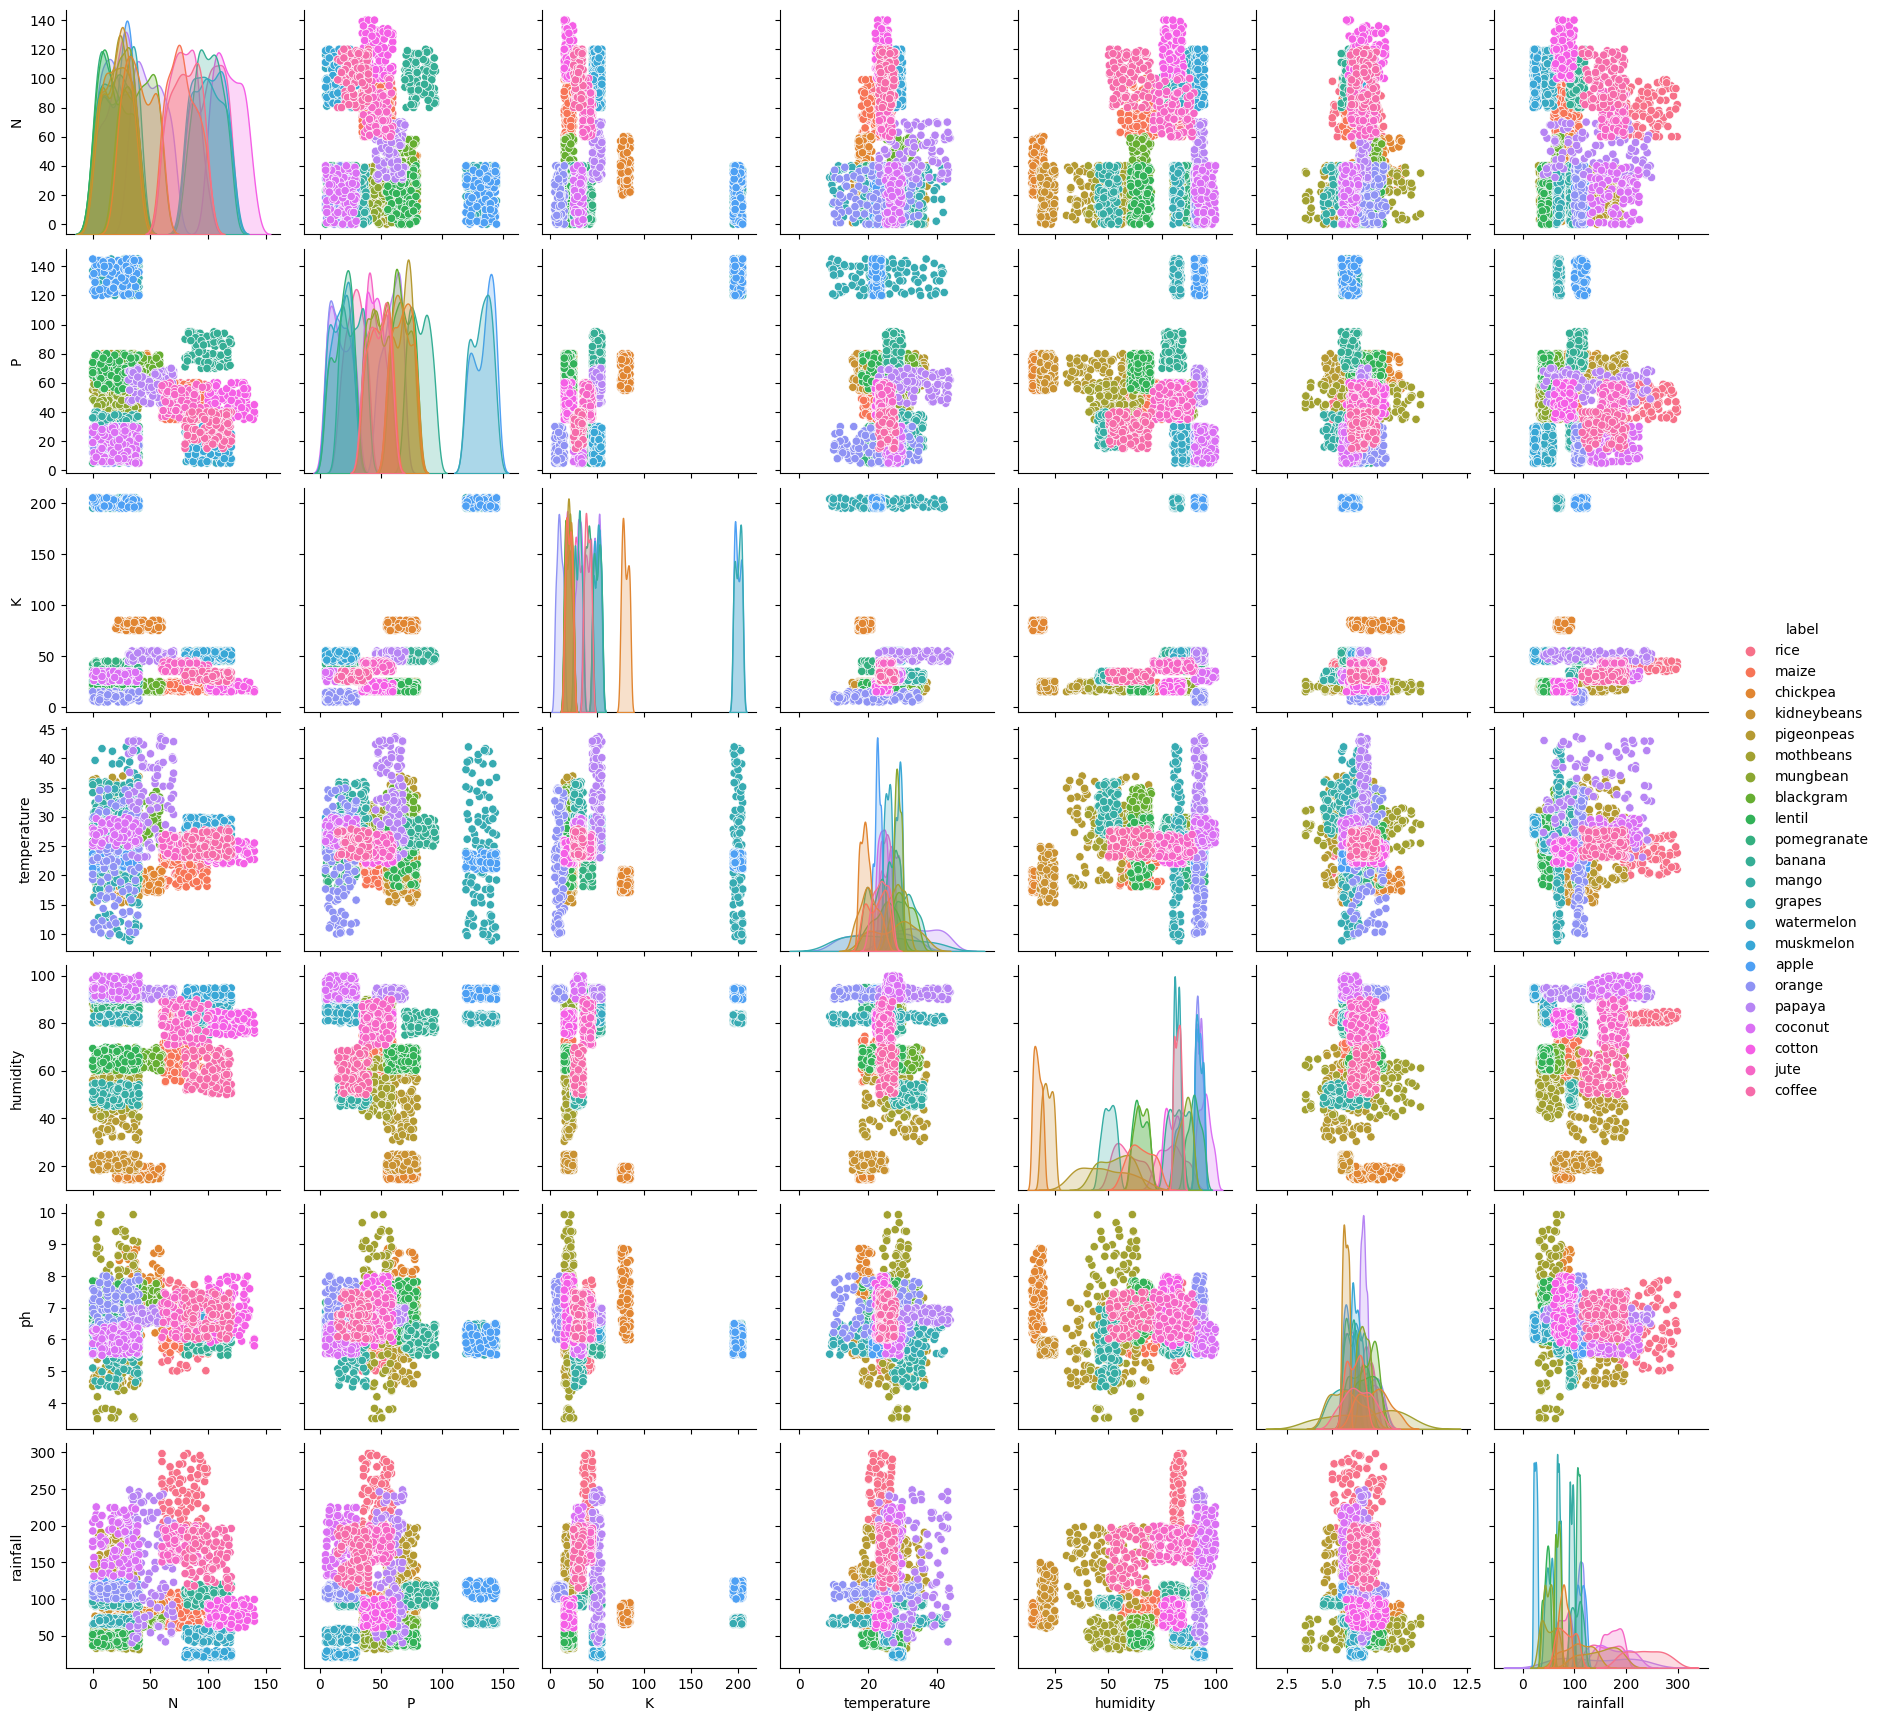

In [18]:
# Pairplot allows us to plot pairwise relationships between variables within a dataset
sns.pairplot(df, hue ='label')

In [19]:
# Get pairplot graph lines by variable
def scatter_func(var):
  df_=df
  df_=df_.drop([var, 'label'], axis=1)
  sns.pairplot(df,
              x_vars=df_.columns,
              y_vars=var, hue='label', height=5)
  plt.suptitle(f'Visualizing {var} with other variables', size=20, y=1.05)

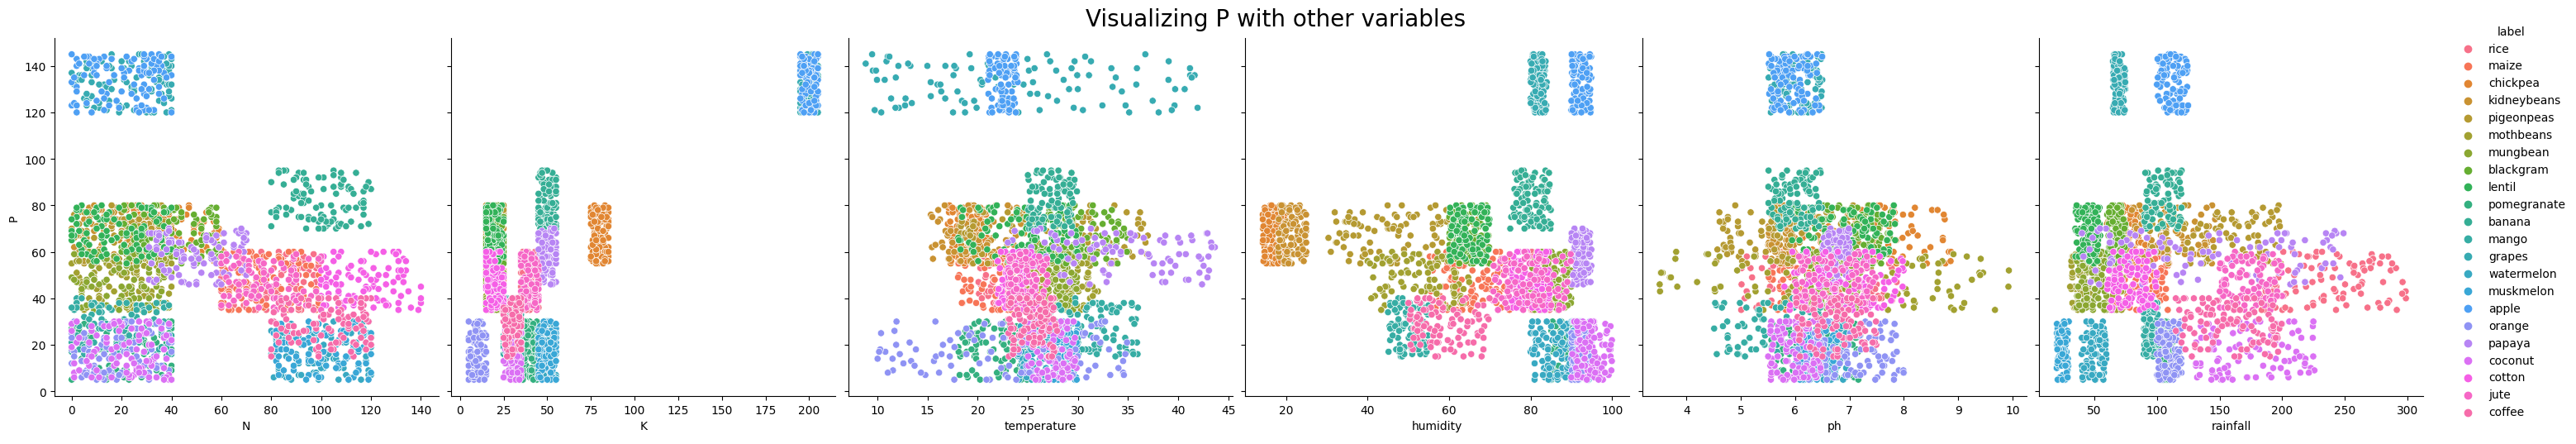

In [20]:
scatter_func("P")

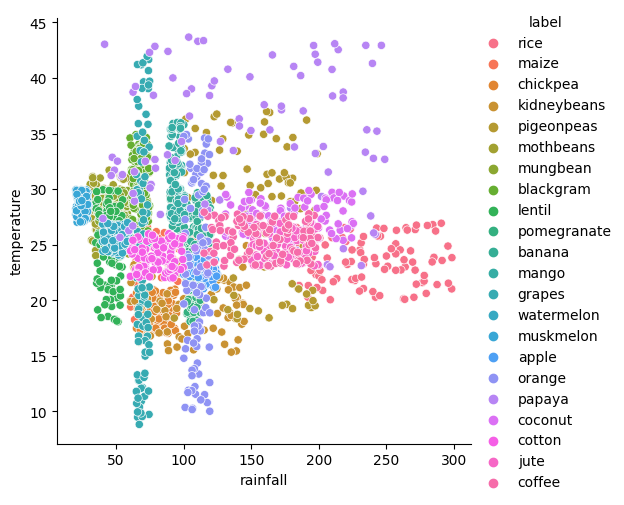

In [21]:
# Get pairplot graph of 2 variables
sns.relplot(x='rainfall',y='temperature',data=df,kind='scatter',hue='label',height=5)
plt.show()

<ipython-input-22-c88cd40ccf99>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

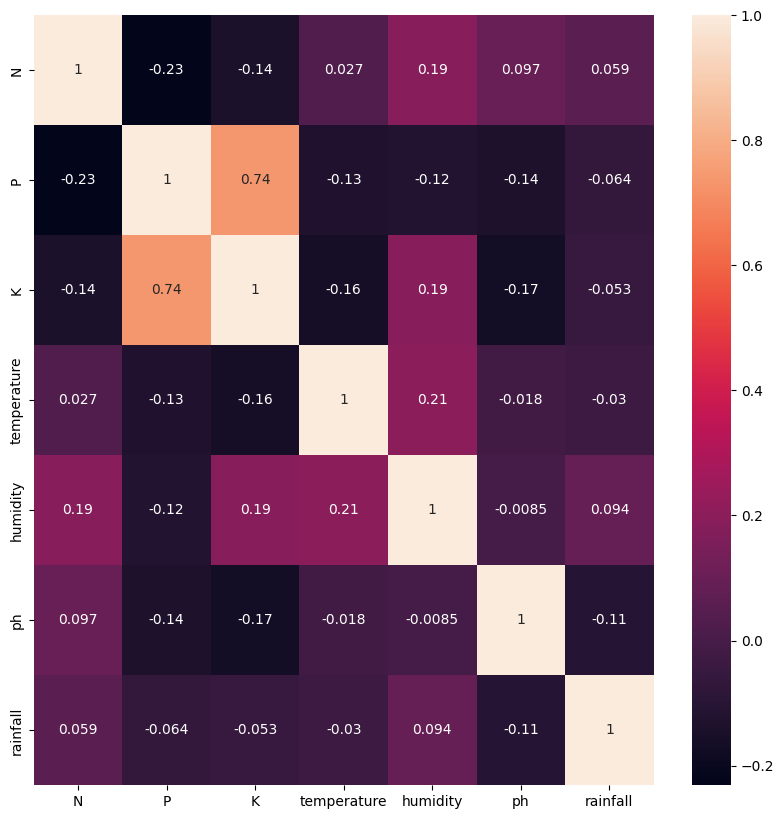

In [22]:
# Heatmaps, show the relation between variabels.
""" Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by warm colors, such as red or orange.
Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by cool colors, such as blue or green."""
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

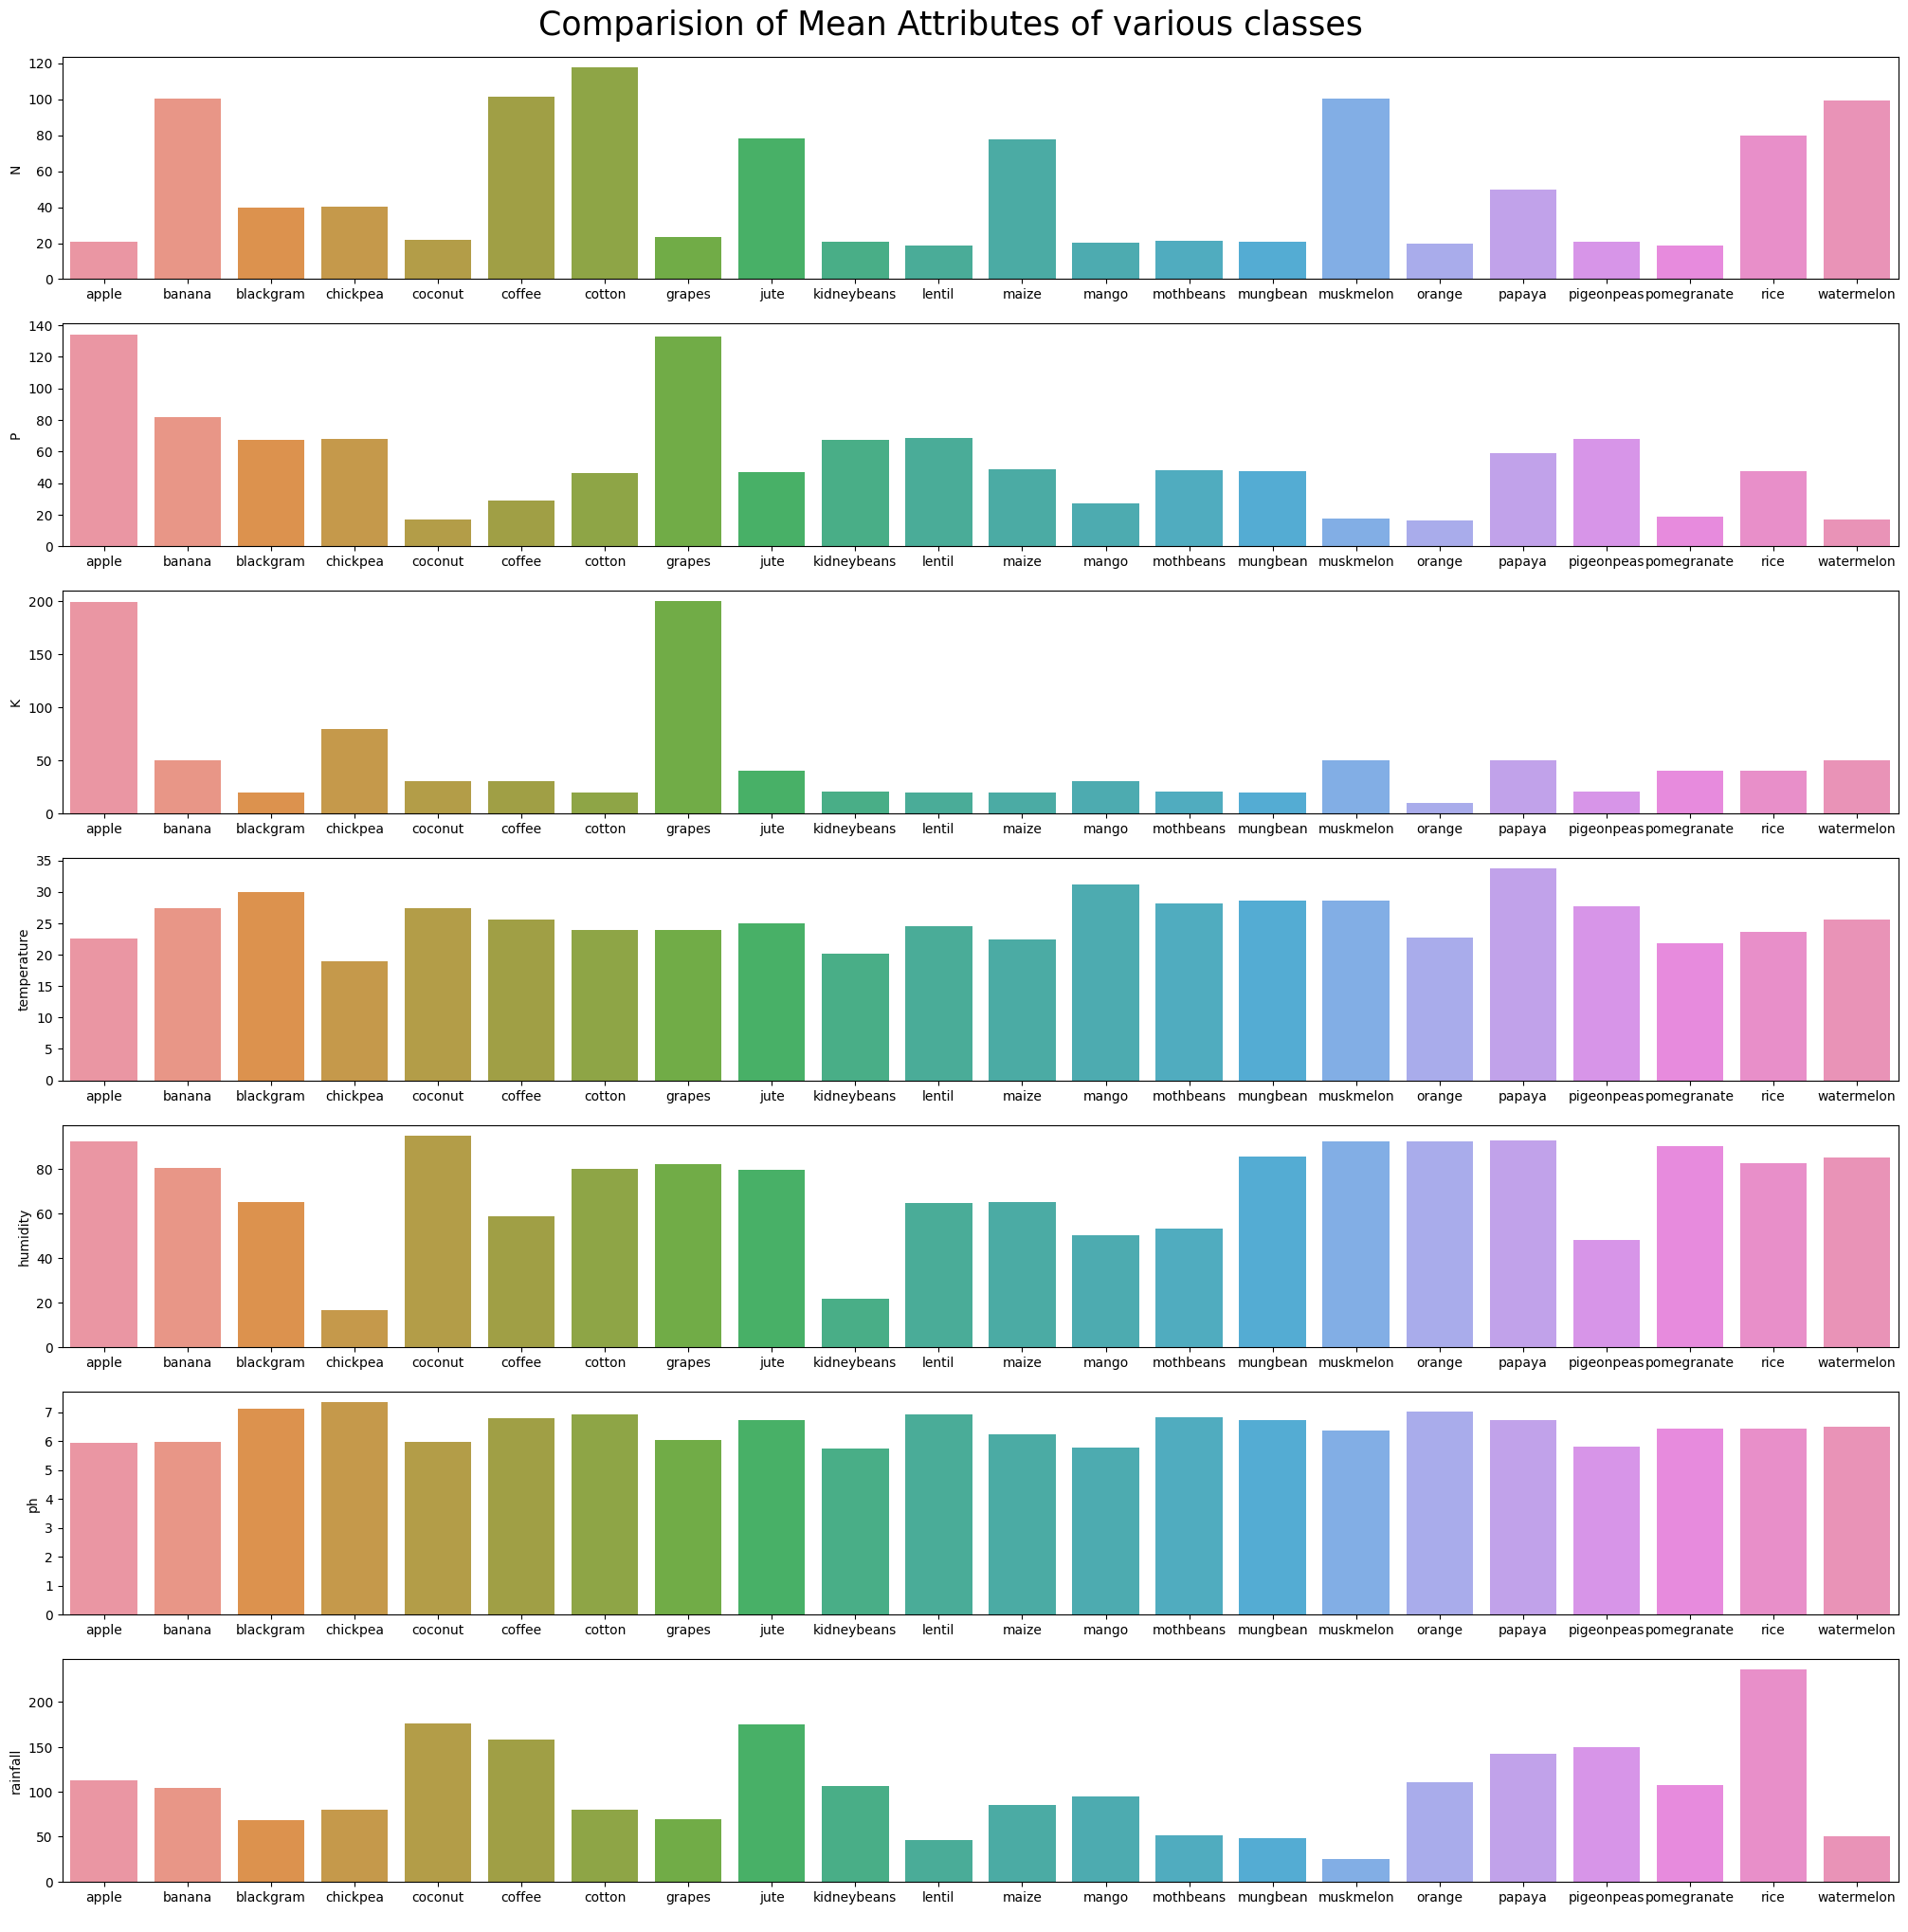

In [23]:
# Comparision of Mean Attributes of various classes
fig,ax=plt.subplots(7,1,figsize=(25,25))
fig.suptitle("Comparision of Mean Attributes of various classes",size=25, y= 0.9)
grouped = df.groupby(by='label').mean().reset_index()
for index,i in enumerate(grouped.columns[1:]):
    sns.barplot(data=grouped,x='label',y=i,ax=ax[index]).set(xlabel=' ')


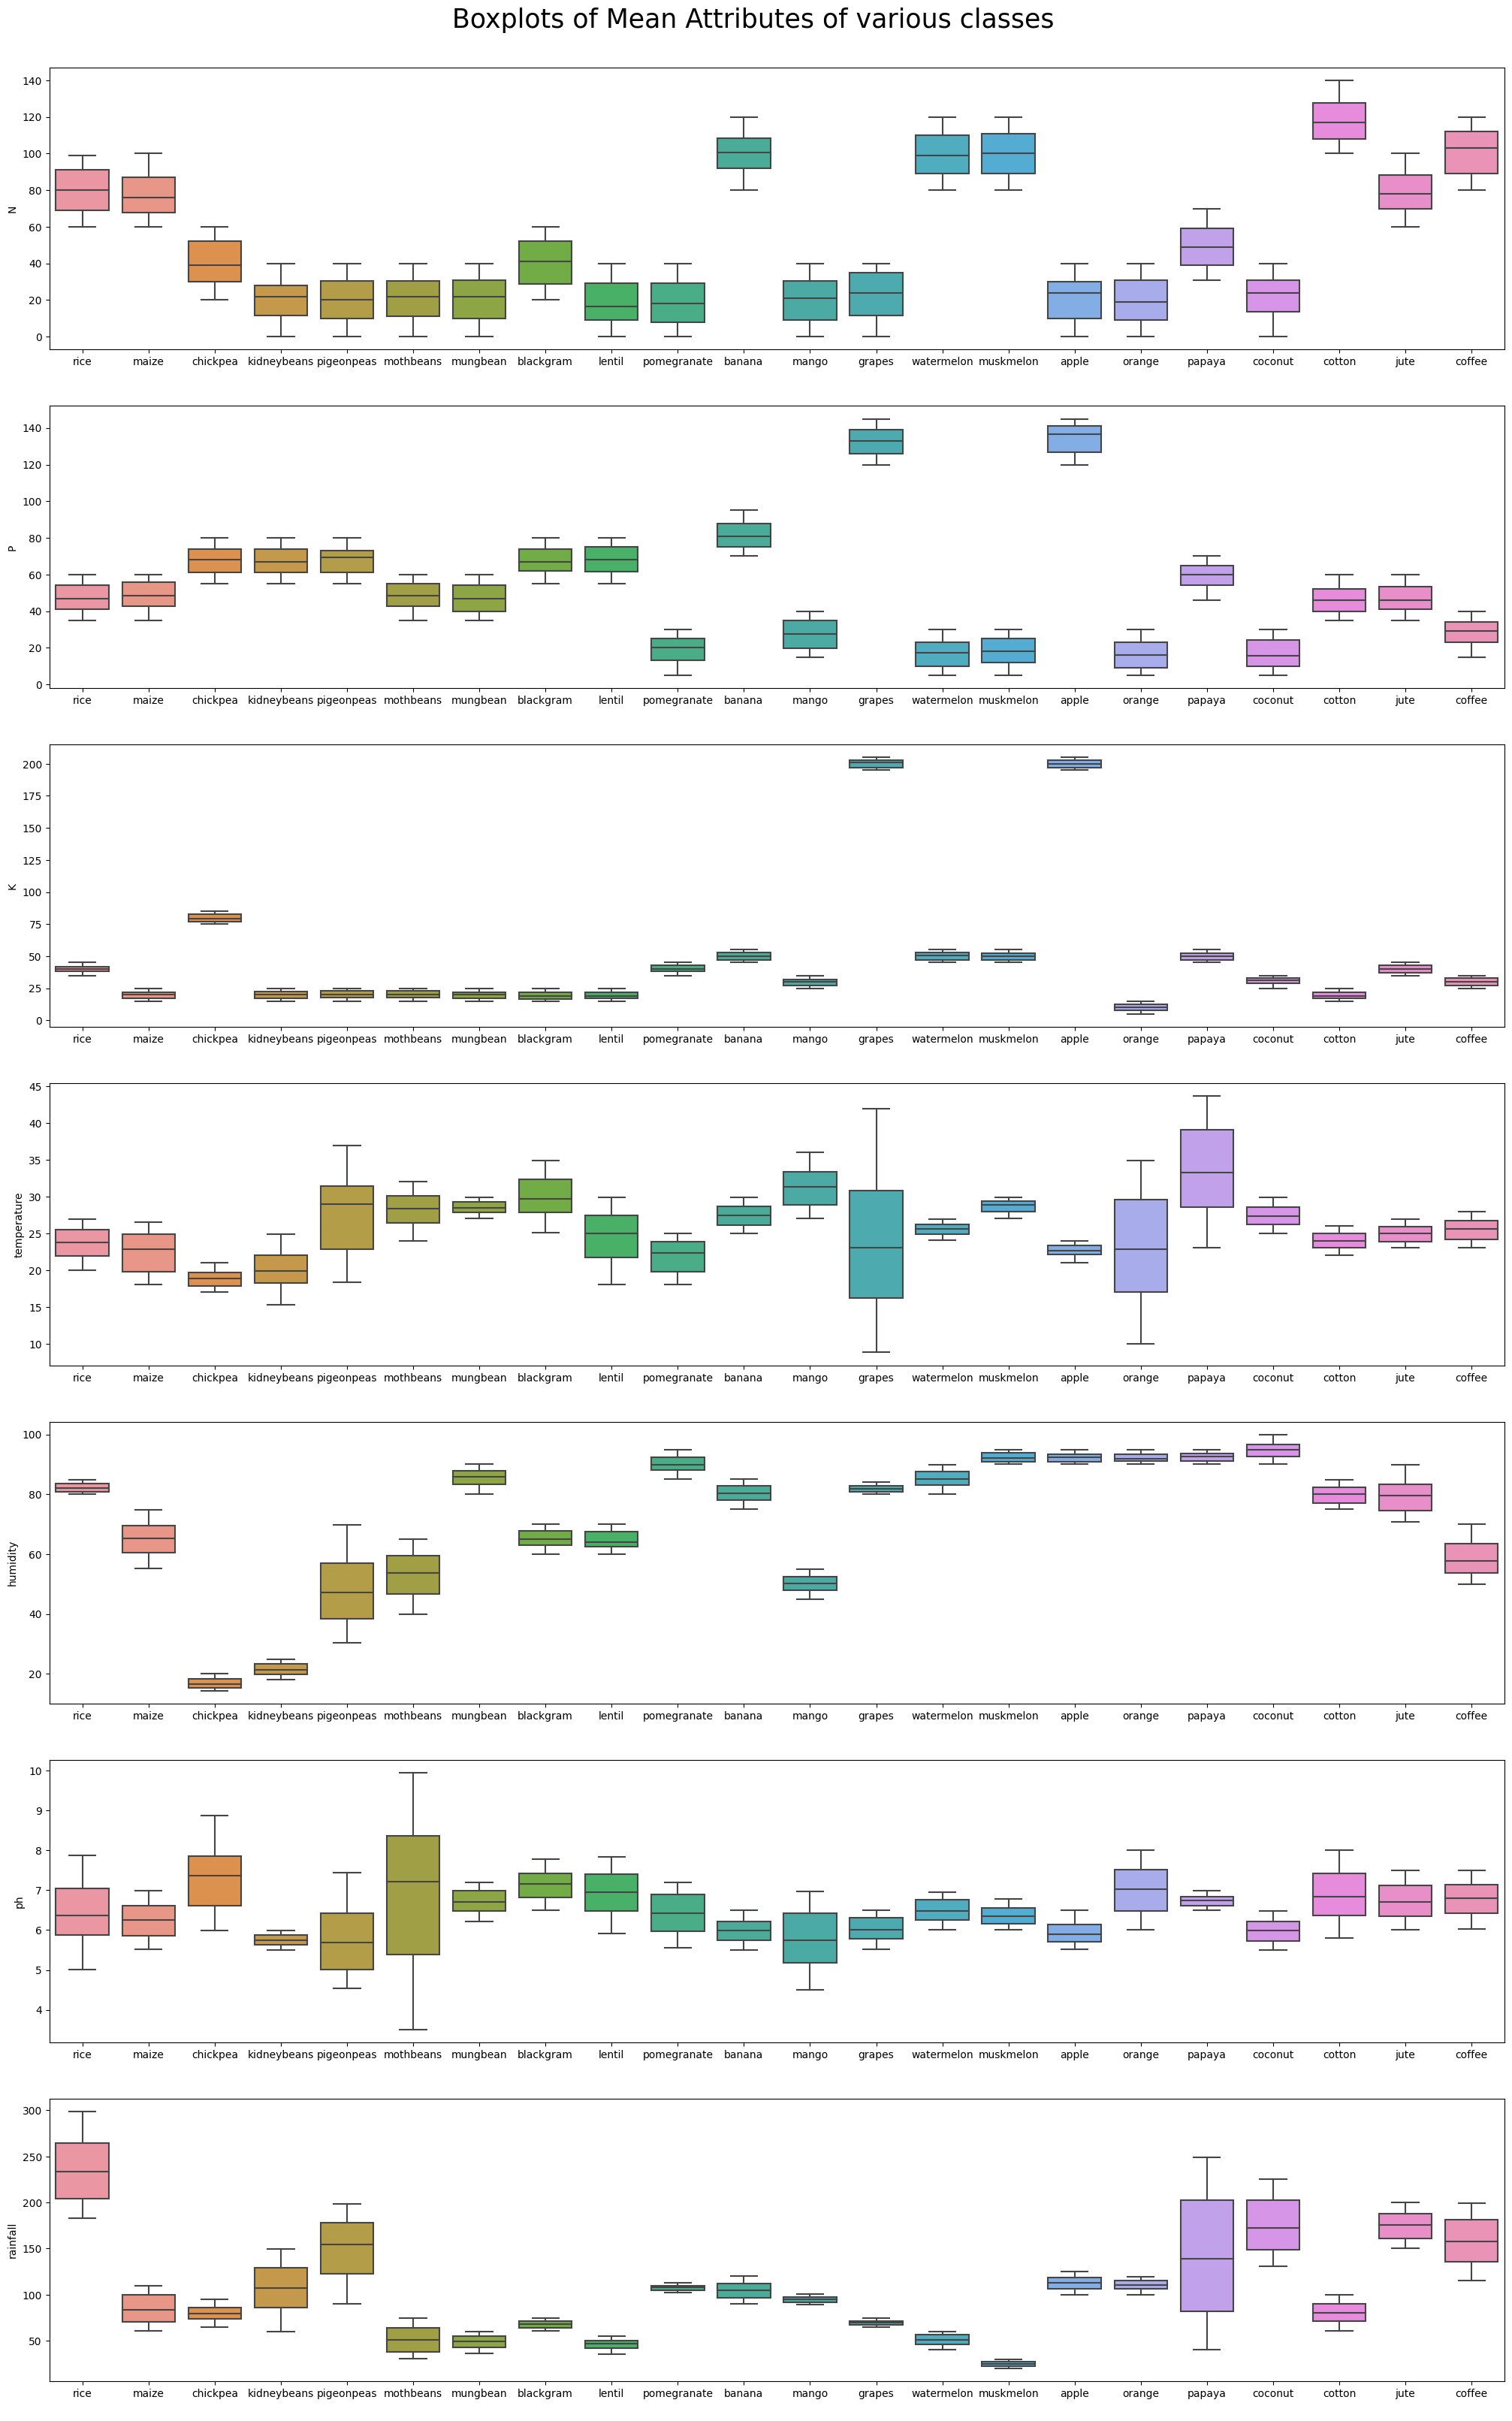

In [24]:
# Boxplots of Mean Attributes of various classes
fig,ax=plt.subplots(7,1,figsize=(25,40))
fig.suptitle("Boxplots of Mean Attributes of various classes",size=25, y=0.9)
grouped = df.groupby(by='label').mean().reset_index()
for index,i in enumerate(grouped.columns[1:]):
    sns.boxplot(data=df,x='label',y=i,ax=ax[index]).set(xlabel=' ')

In [25]:
# Get pairplot graph by variable
def boxplot_func(var):
  sns.catplot(data=df, x='label', y=var, kind='box', height=10, aspect=20/8.27)
  plt.xticks(rotation='vertical')
  plt.title(var, size=20)
  plt.show()

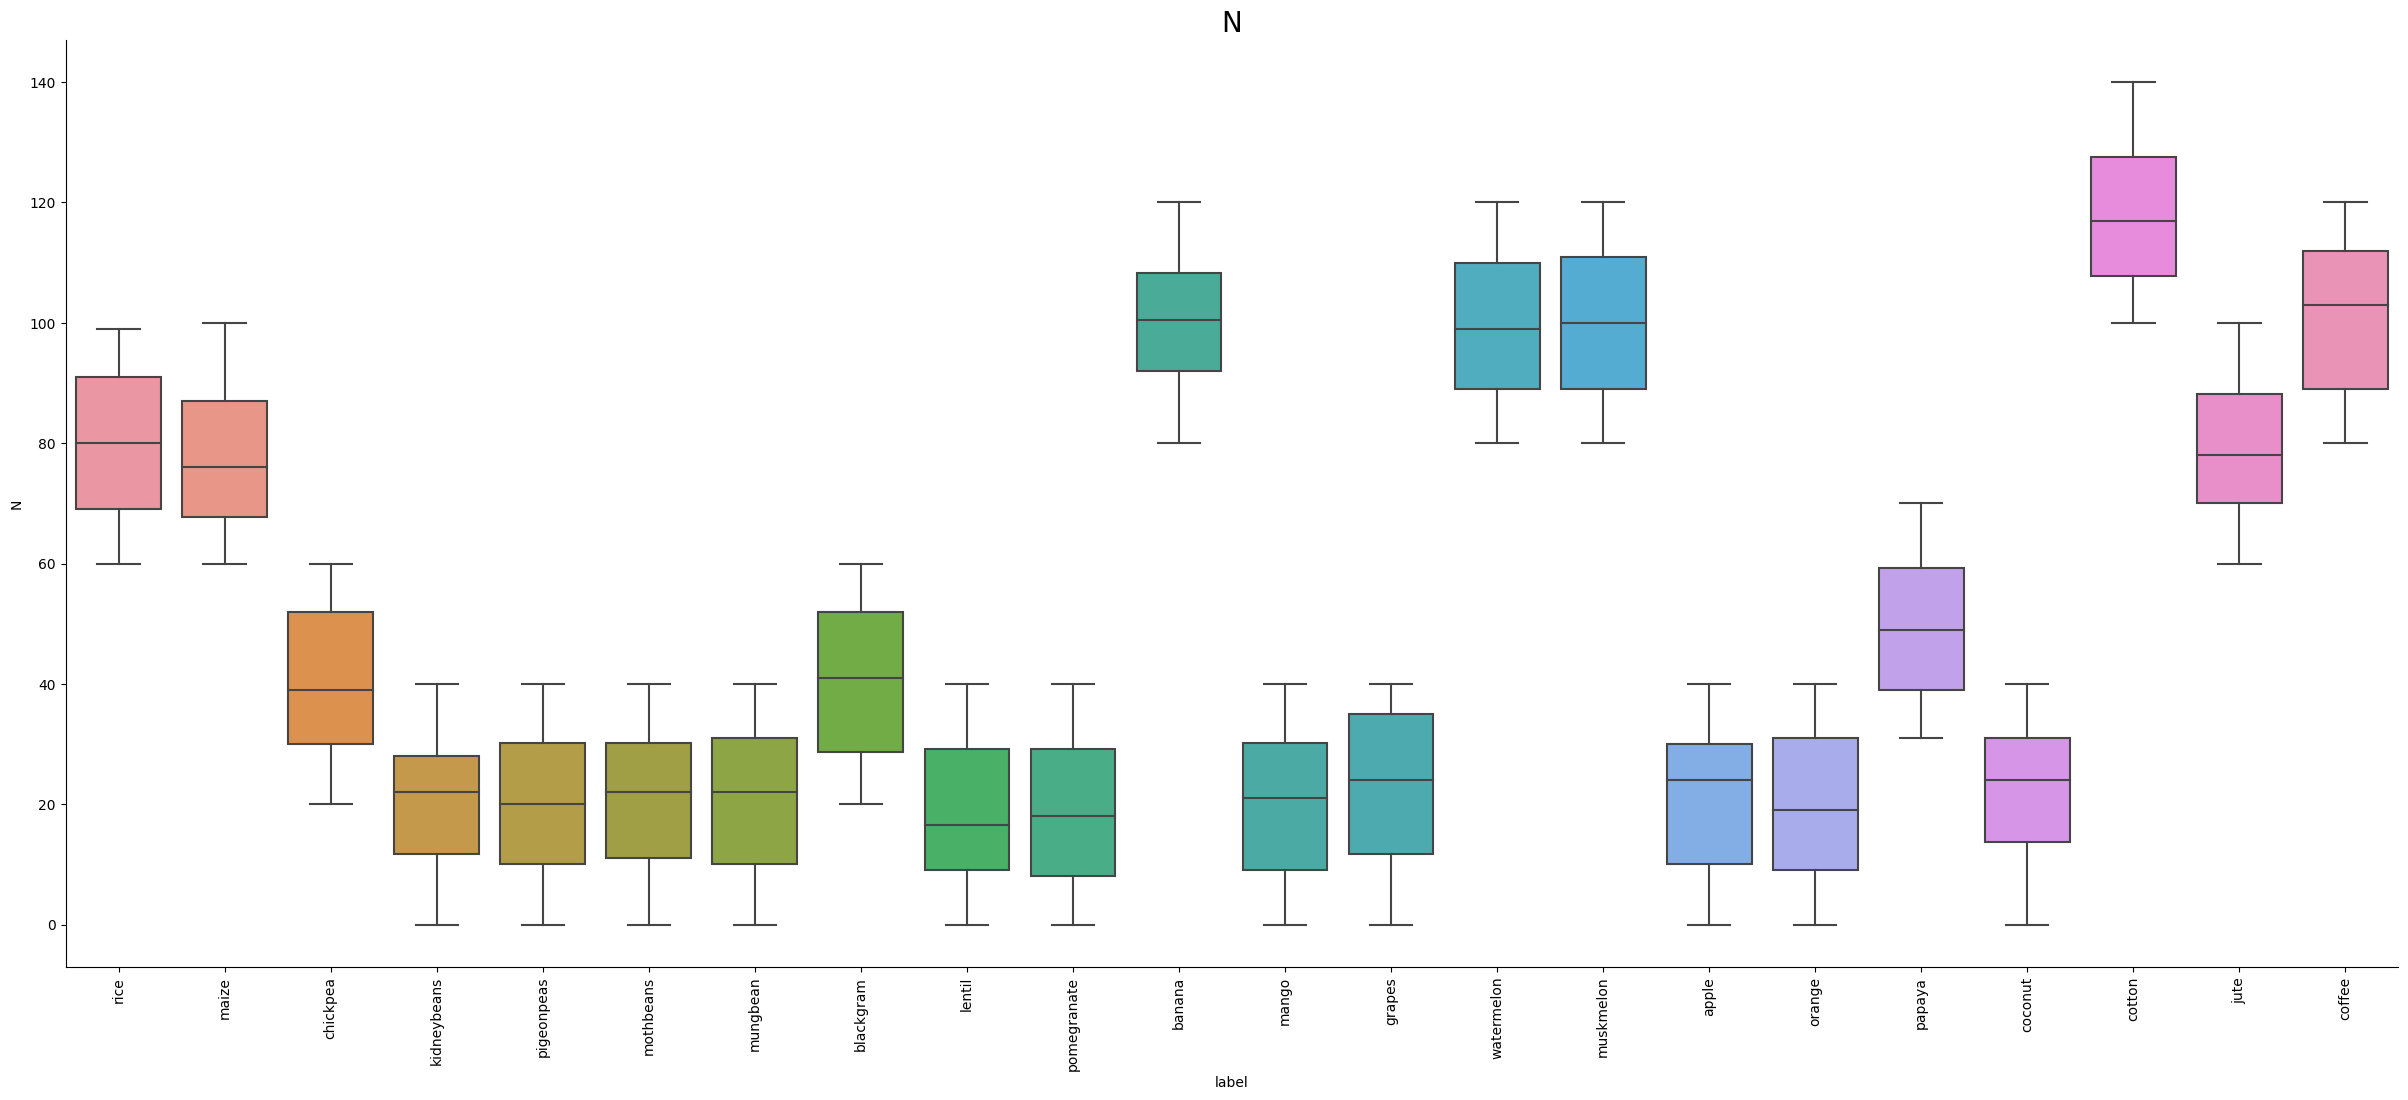

In [26]:
boxplot_func('N')

Additional Analyze Functions

In [27]:
# Returns the entered crop's requirements respect to entered condition
def crop_condition(crop, condition):
    x = df[df['label'] == crop]
    print("-------------------------------------------------")
    print("Statistics for :" + condition)
    print("Minimum Nitrogen Required :", x[condition].min())
    print("Average Nitrogen Required :", x[condition].mean())
    print("Maximum Nitrogen Required :", x[condition].max())
    print("-------------------------------------------------")

In [28]:
crop_condition('orange', 'N')

-------------------------------------------------
Statistics for :N
Minimum Nitrogen Required : 0
Average Nitrogen Required : 19.58
Maximum Nitrogen Required : 40
-------------------------------------------------


In [29]:
# Returns the entered crop's requirements
def crop_summary(crop):
   con = df.columns.values.tolist()
   con.remove('label')
   for c in con:
    x = df[df['label'] == crop]
    print("Statistics for : " + c)
    print("Minimum Nitrogen Required :", x[c].min())
    print("Average Nitrogen Required :", x[c].mean())
    print("Maximum Nitrogen Required :", x[c].max())
    print("-------------------------------------------------")

In [30]:
crop_summary('orange')

Statistics for : N
Minimum Nitrogen Required : 0
Average Nitrogen Required : 19.58
Maximum Nitrogen Required : 40
-------------------------------------------------
Statistics for : P
Minimum Nitrogen Required : 5
Average Nitrogen Required : 16.55
Maximum Nitrogen Required : 30
-------------------------------------------------
Statistics for : K
Minimum Nitrogen Required : 5
Average Nitrogen Required : 10.01
Maximum Nitrogen Required : 15
-------------------------------------------------
Statistics for : temperature
Minimum Nitrogen Required : 10.01081312
Average Nitrogen Required : 22.7657254967
Maximum Nitrogen Required : 34.90665289
-------------------------------------------------
Statistics for : humidity
Minimum Nitrogen Required : 90.00621688
Average Nitrogen Required : 92.17020876340001
Maximum Nitrogen Required : 94.96419851
-------------------------------------------------
Statistics for : ph
Minimum Nitrogen Required : 6.010391864
Average Nitrogen Required : 7.01695745276
Max

In [31]:
# Returns the entered condition's comparation for all crops
def compare(condition):
  print("Average Value for",condition,"is {0: .2f}".format(df[condition].mean()))
  print("----------------------------------------------------------------")
  for c in df['label'].unique():
    df_= df[df['label'] == c]
    print(c,": {0: .2f}".format(df_[condition].mean()))

In [32]:
compare('N')

Average Value for N is  50.55
----------------------------------------------------------------
rice :  79.89
maize :  77.76
chickpea :  40.09
kidneybeans :  20.75
pigeonpeas :  20.73
mothbeans :  21.44
mungbean :  20.99
blackgram :  40.02
lentil :  18.77
pomegranate :  18.87
banana :  100.23
mango :  20.07
grapes :  23.18
watermelon :  99.42
muskmelon :  100.32
apple :  20.80
orange :  19.58
papaya :  49.88
coconut :  21.98
cotton :  117.77
jute :  78.40
coffee :  101.20
